In [1]:
import matplotlib.pyplot as plt
plt.ion()

import cartopy.crs as ccrs

import pandas as pd

from orbit_predictor.sources import NoradTLESource
from orbit_predictor.predictors import TLEPredictor

In [2]:
source = NoradTLESource.from_url("http://www.celestrak.com/NORAD/elements/resource.txt")
predictor = TLEPredictor("NUSAT-3", source)

In [3]:
dates = pd.date_range(start="2017-12-11 00:00", periods=1000, freq="30S")

In [4]:
latlon = pd.DataFrame(index=dates, columns=["lat", "lon"])

In [5]:
for date in dates:
    lat, lon, _ = predictor.get_position(date).position_llh
    latlon.loc[date] = (lat, lon)

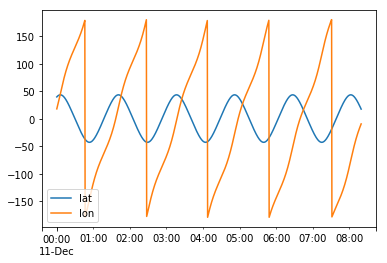

In [6]:
latlon.plot()

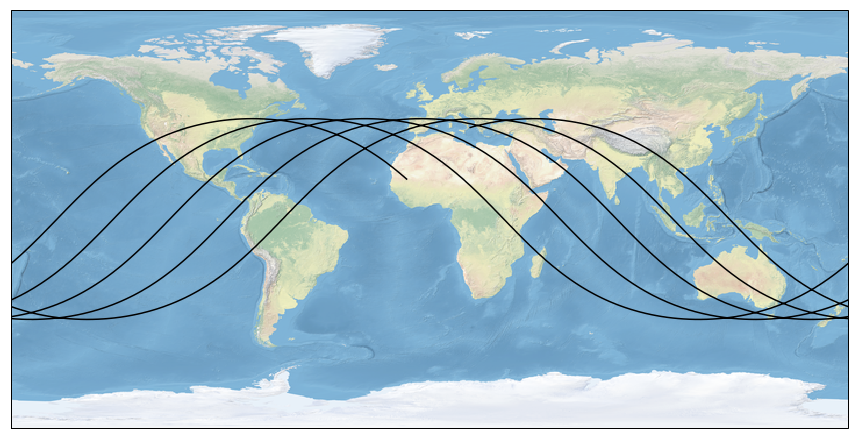

In [7]:
plt.figure(figsize=(15, 25))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.plot(latlon["lon"], latlon["lat"], 'k',
         transform=ccrs.Geodetic(),
         )